Costa Rican Household Group Project Submission by - Rajkumar, Jagadeeswaran and Saravanan 

# 1.0 Clear memory

In [47]:
%reset -f

# 1.1 Import ALL libraries


In [153]:
from time import time
import pandas as pd
import numpy as np
from sklearn.random_projection import SparseRandomProjection as sr  # Projection features
from sklearn.cluster import KMeans                    # Cluster features
from sklearn.preprocessing import PolynomialFeatures  # Interaction features
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os, time, gc
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import auc, roc_curve
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
import eli5
from eli5.sklearn import PermutationImportance
import time
import os
import gc
import random
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingClassifier as gbm
from bayes_opt import BayesianOptimization
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV


# 2.0 Set working directory and read file

In [50]:
os.chdir("C:\\Users\\rajku\\OneDrive\\Documents\\Training\\Big Data\\Python\\Kaggle\\Costa Rica")
os.listdir()

['.ipynb_checkpoints',
 'Costa Rican Household - Data Analytics 0507.ipynb',
 'Costa Rican Household - Data Analytics 0507_RajD-Copy1.ipynb',
 'Costa Rican Household - Data Analytics 0507_RajD.ipynb',
 'Costa Rican Household - Data Analytics 0529 V2.0.ipynb',
 'Costa Rican Household - Data Analytics 0529 V4.0.ipynb',
 'Costa Rican Household - Data Analytics 0529 V5.ipynb',
 'Costa Rican Household - Data Analytics 0529 V6.ipynb',
 'Costa Rican Household - Data Analytics 0530 V7.ipynb',
 'Costa Rican Household - Data Analytics 0531 V9.ipynb',
 'Costa Rican Household - Data Analytics-Raj D.ipynb',
 'Costa Rican Household - Data Analytics.ipynb',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

# 2.1 Read train/test files

In [51]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [52]:
train.shape, test.shape

((9557, 143), (23856, 142))

# 3.0 Data Visualization

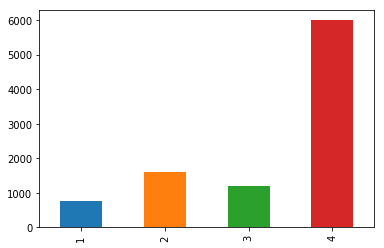

In [53]:

train['Target'].value_counts().sort_index().plot(kind='bar')

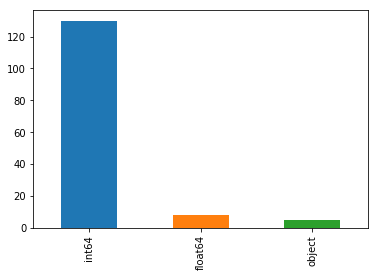

In [54]:
train.dtypes.value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021AD0902AC8>,
      dtype=object)

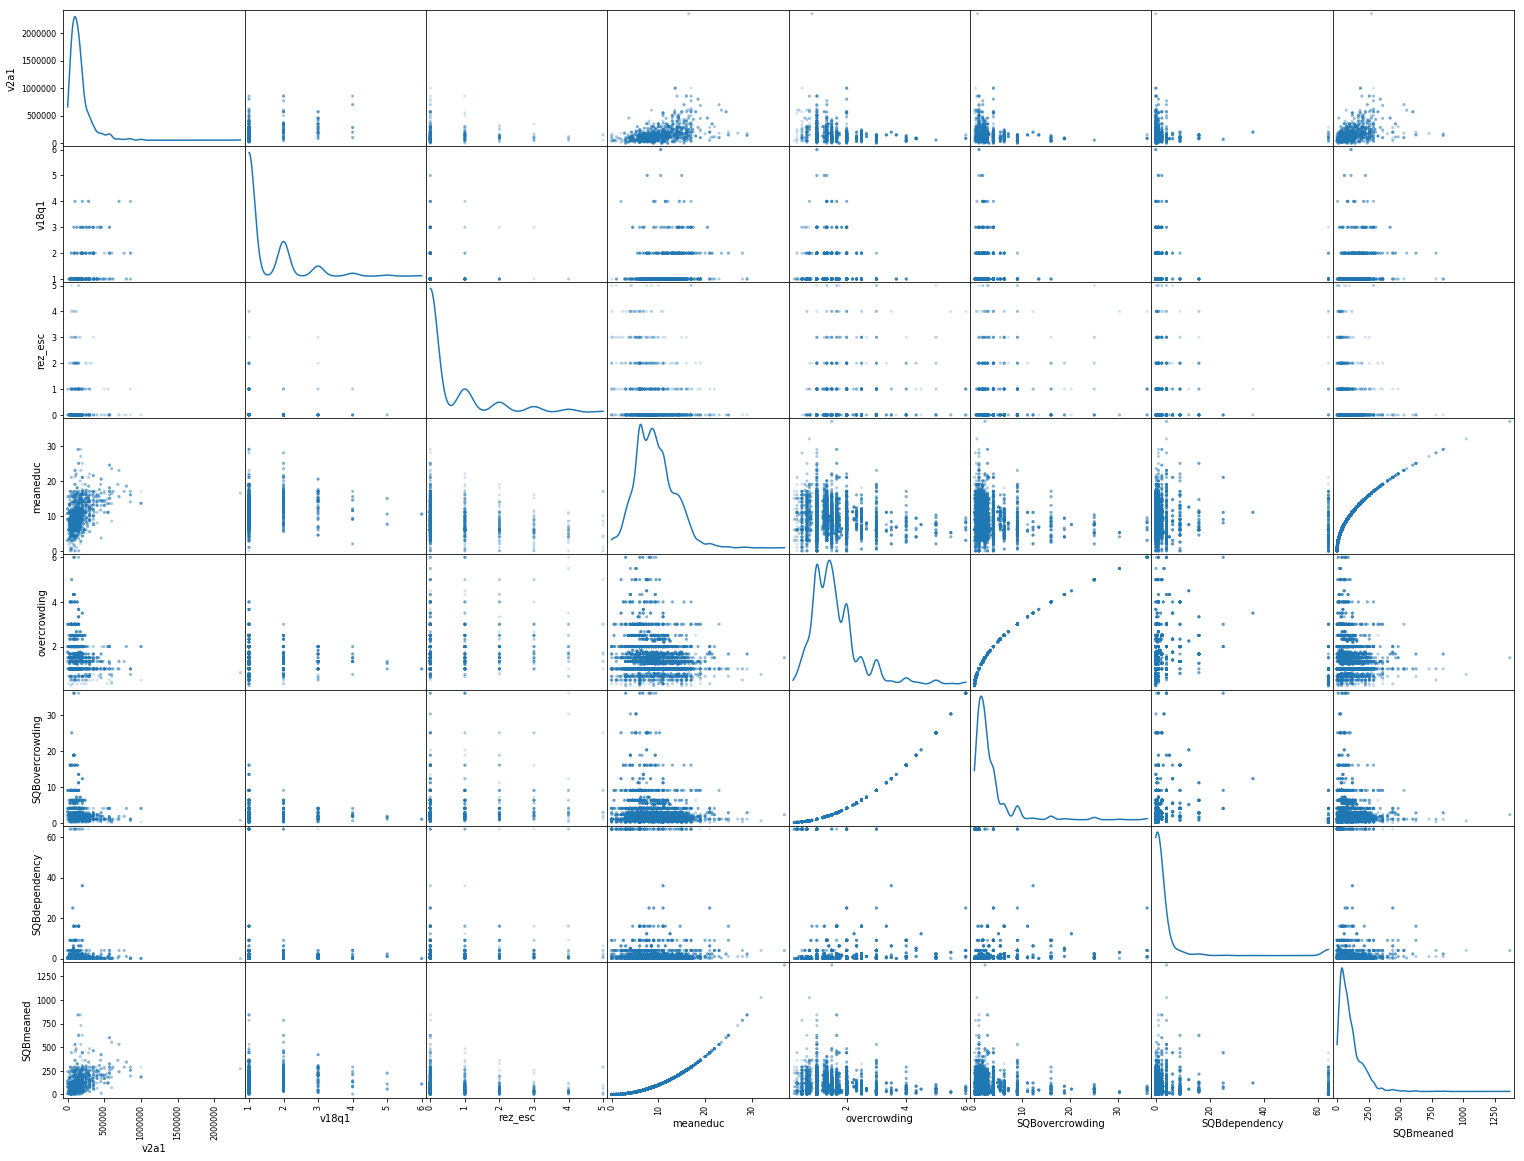

In [55]:
from pandas.plotting import scatter_matrix
scatter_matrix(train.select_dtypes('float'), alpha=0.2, figsize=(26, 20), diagonal='kde')

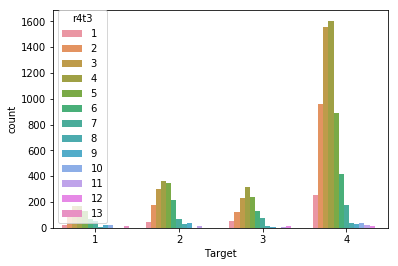

In [56]:
sns.countplot(data=train,
             x='Target',
             hue='r4t3')

In [57]:
trainPV = pd.pivot_table(train,index="Target", values=["r4t3"],aggfunc=np.mean)
trainPV

,r4t3
Target,
1,4.458278
2,4.370695
3,4.280397
4,3.796531


In [58]:
trainPVdf = trainPV.reset_index()
trainPVdf

,Target,r4t3
0,1,4.458278
1,2,4.370695
2,3,4.280397
3,4,3.796531


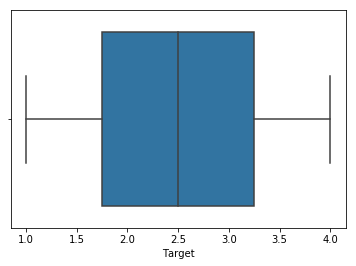

In [59]:
sns.boxplot(data=trainPV.reset_index(),
             x='Target',
             hue='r4t3')

In [60]:
train.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ACF8F5438>,
      dtype=object)

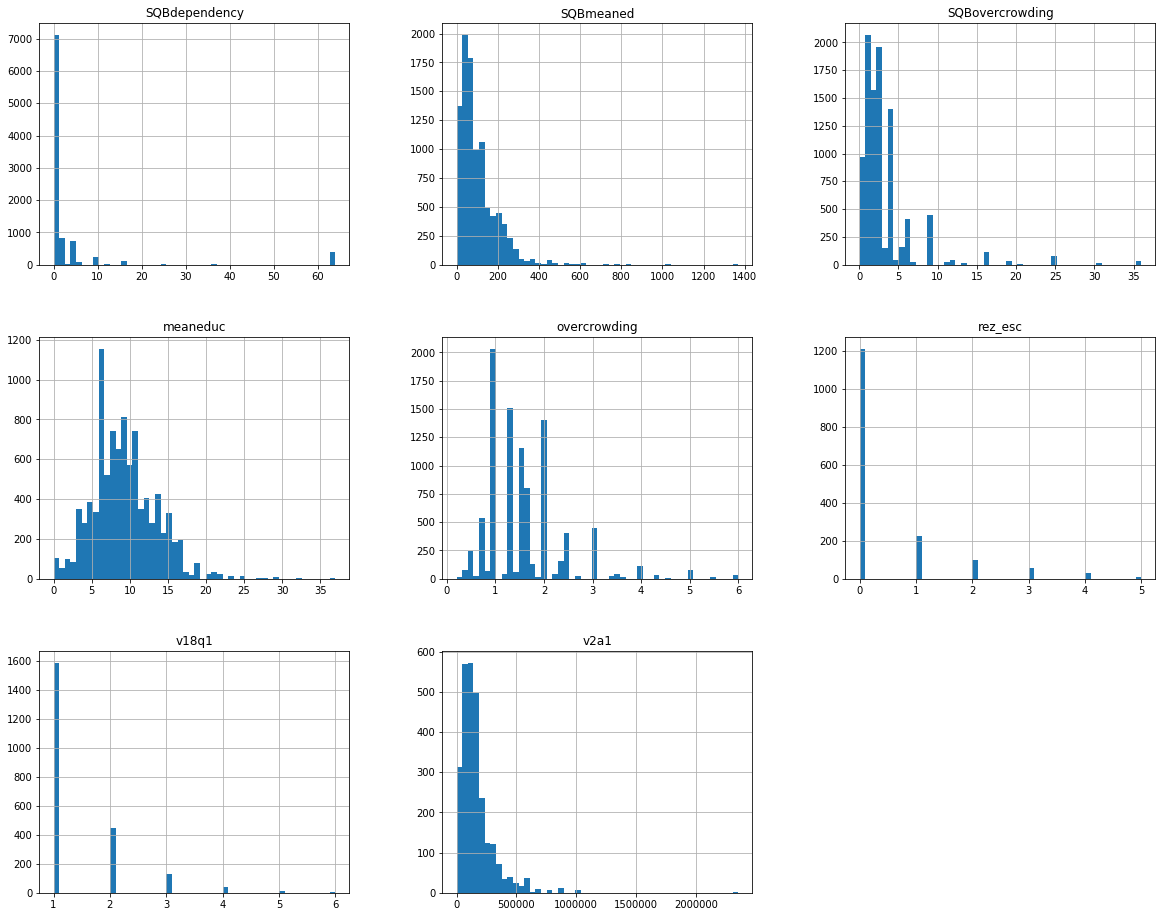

In [61]:
train.select_dtypes('float').hist(bins=50,figsize=(20,16))

In [62]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


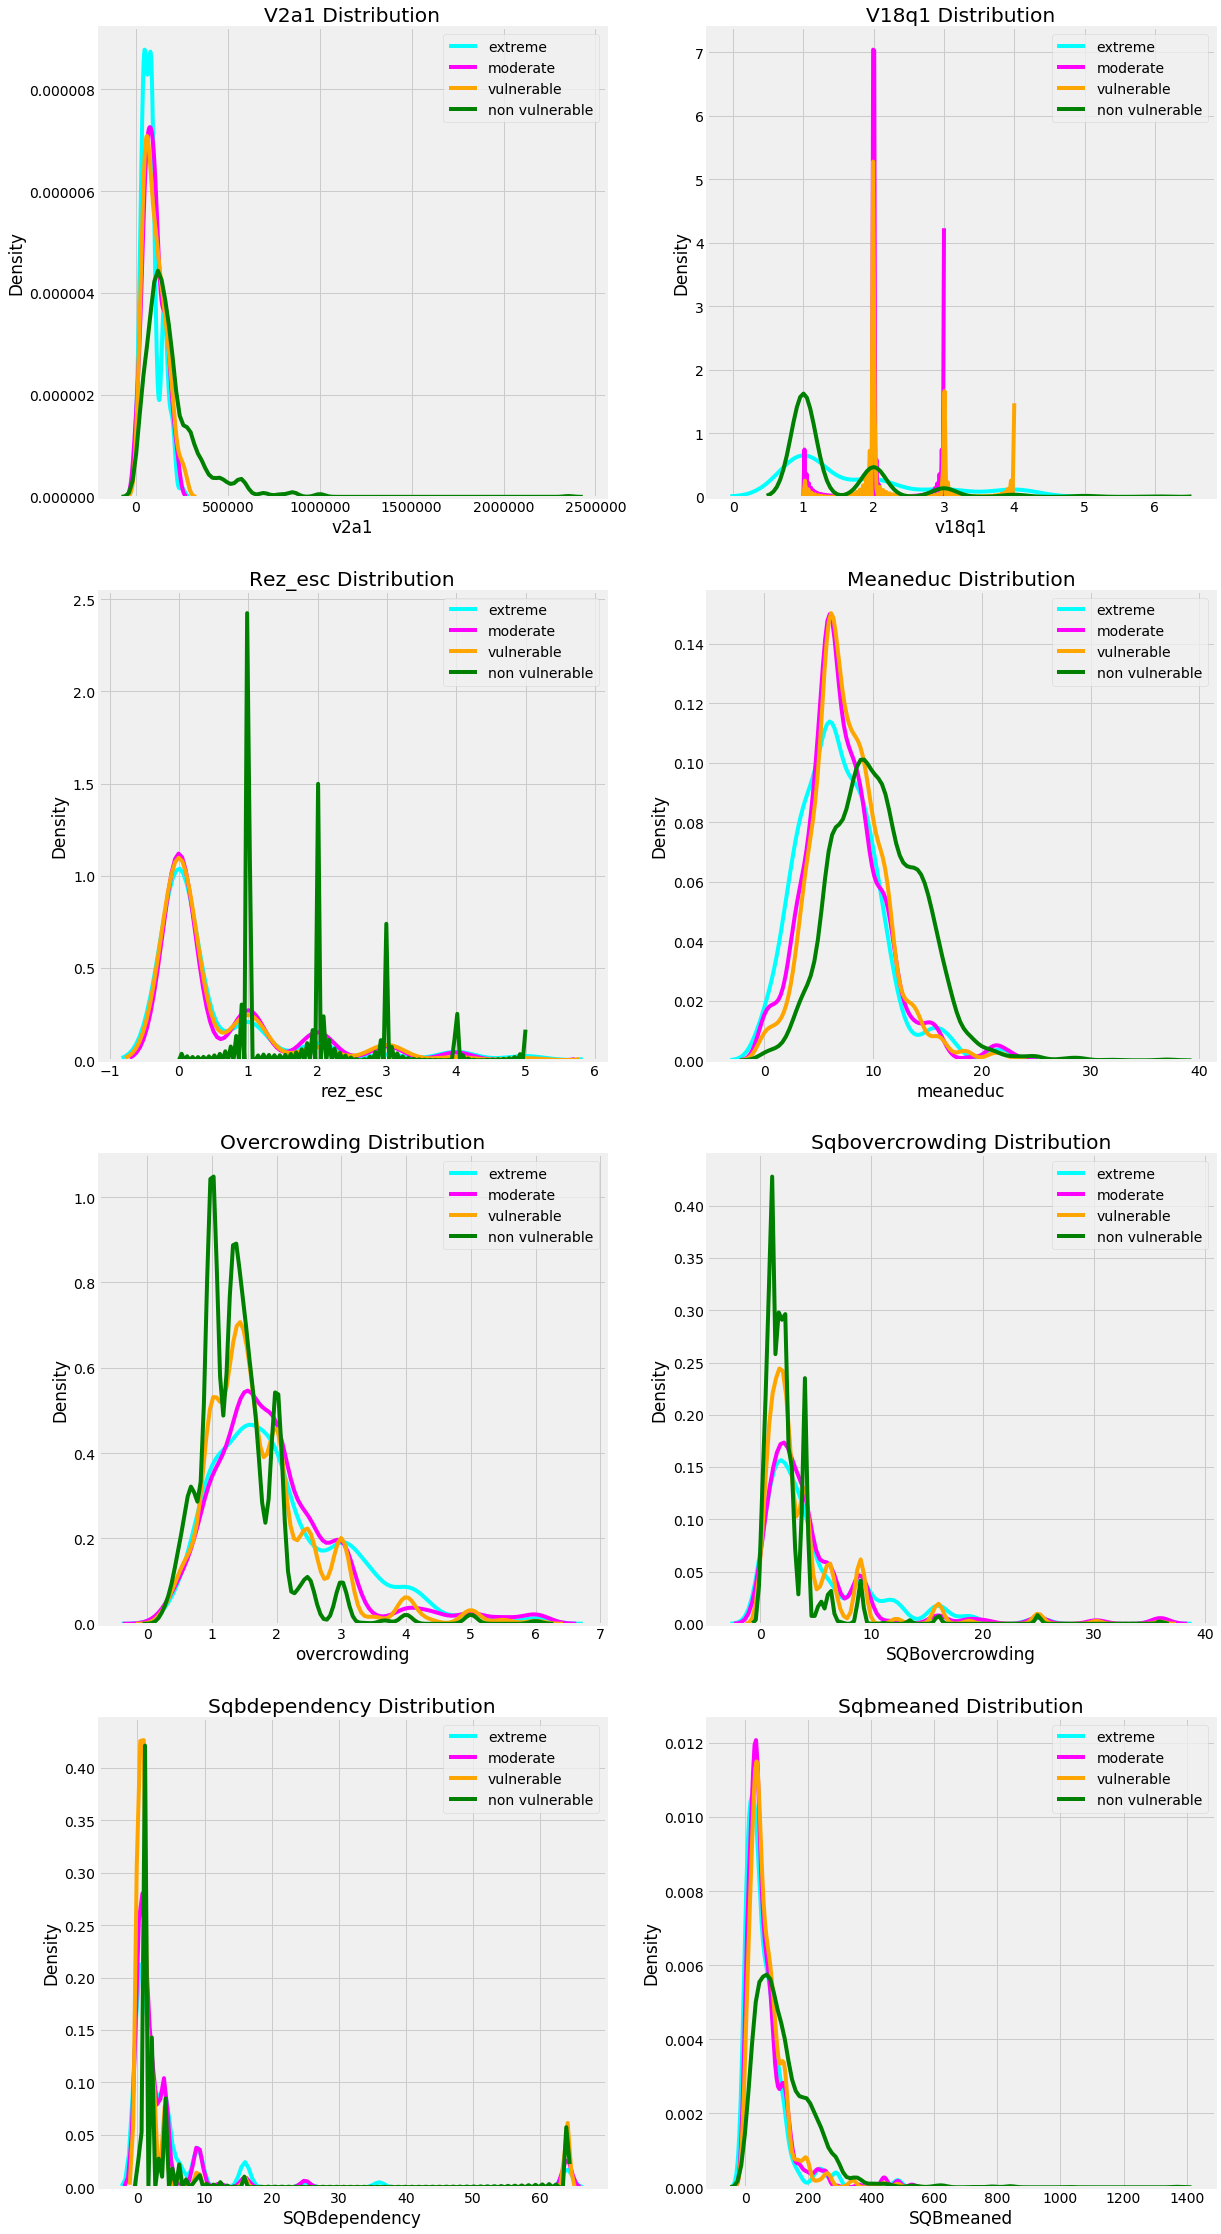

In [64]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'cyan', 2: 'magenta', 3: 'orange', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

# 3.1 Let us make operations to balance the values in columns and drop columns not needed 

In [96]:

train['dependency']=train['dependency'].replace(['yes','no'],[1,0]).astype(np.float64)
train['edjefe']=train['edjefe'].replace(['yes','no'],[1,0]).astype(np.float64)
train['edjefa']=train['edjefa'].replace(['yes','no'],[1,0]).astype(np.float64)
train.drop(columns = ['Id','idhogar'] , inplace = True)


In [97]:

test['dependency']=test['dependency'].replace(['yes','no'],[1,0]).astype(np.float64)
test['edjefe']=test['edjefe'].replace(['yes','no'],[1,0]).astype(np.float64)
test['edjefa']=test['edjefa'].replace(['yes','no'],[1,0]).astype(np.float64)
test.drop(columns = ['Id','idhogar'] , inplace = True)


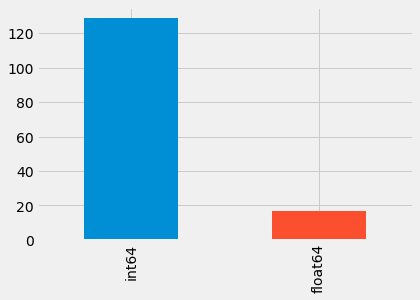

In [98]:
train.dtypes.value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021AD414D358>,
      dtype=object)

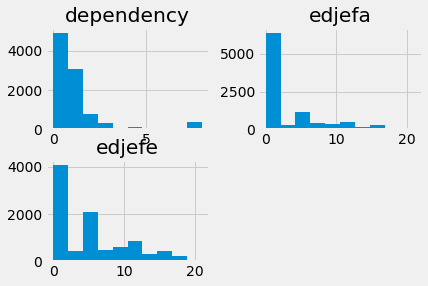

In [99]:
train[['dependency','edjefe','edjefa']].hist(bins=10)

# 3.2 Lets us deal the NaN in all columns of Train and Test

In [100]:
# Number of missing data in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = (missing['total'] / len(train)*100)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
v2a1,0,0.0
instlevel8,0,0.0
parentesco12,0,0.0
hogar_nin,0,0.0
hogar_adul,0,0.0
hogar_mayor,0,0.0
hogar_total,0,0.0
dependency,0,0.0
edjefe,0,0.0
edjefa,0,0.0


# 3.2.1 Let us Impute with MEAN of the column for the most missing Numeric values and MOST FREQUENT for the Object variables/categorical values.

In [101]:
imp = SimpleImputer(strategy="mean") 
train['rez_esc'] = imp.fit_transform(train[['rez_esc']])
train['v18q1'] = imp.fit_transform(train[['v18q1']])
train['v2a1'] = imp.fit_transform(train[['v2a1']])
train['SQBmeaned'] = imp.fit_transform(train[['SQBmeaned']])
train['meaneduc'] = imp.fit_transform(train[['meaneduc']])
test['rez_esc'] = imp.fit_transform(test[['rez_esc']])
test['v18q1'] = imp.fit_transform(test[['v18q1']])
test['v2a1'] = imp.fit_transform(test[['v2a1']])
test['SQBmeaned'] = imp.fit_transform(test[['SQBmeaned']])
test['meaneduc'] = imp.fit_transform(test[['meaneduc']])

In [102]:
# Number of missing data in each column
missing = pd.DataFrame(test.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = (missing['total'] / len(test)*100)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
v2a1,0,0.0
instlevel8,0,0.0
parentesco12,0,0.0
hogar_nin,0,0.0
hogar_adul,0,0.0
hogar_mayor,0,0.0
hogar_total,0,0.0
dependency,0,0.0
edjefe,0,0.0
edjefa,0,0.0


In [103]:
train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBovercrowding,SQBdependency,SQBmeaned,agesq,var,median,mean,std,max,min
0,190000.000000,0,3,0,1,1,0,1.404063,0,1,...,1.000000,0.0,100.0,1849,2.634696e+08,0.0,1.896861e+06,2.226656e+07,2.634696e+08,0.0
1,135000.000000,0,4,0,1,1,1,1.000000,0,1,...,1.000000,64.0,144.0,4489,1.331819e+08,0.0,9.591833e+05,1.125555e+07,1.331819e+08,0.0
2,165231.606971,0,8,0,1,1,0,1.404063,0,0,...,0.250000,64.0,121.0,8464,2.000100e+08,0.0,1.440235e+06,1.690339e+07,2.000100e+08,0.0
3,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,1.777778,1.0,121.0,289,2.364778e+08,0.0,1.702582e+06,1.998540e+07,2.364778e+08,0.0
4,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,1.777778,1.0,121.0,1369,2.364608e+08,0.0,1.702475e+06,1.998396e+07,2.364608e+08,0.0


In [104]:
train.shape, test.shape

((9557, 146), (23856, 146))

In [75]:
train.isnull().sum().sum() , test.isnull().sum().sum()   # 0



(0, 0)

# 3.3 Seperate Target from train dataset

In [76]:
target=train['Target']

In [77]:
train.drop('Target', inplace = True, axis = 1)


# 4.0 Feature Engineering

# Since we are shooting in the dark with very less understanding of data;  Let us create other statistical features and perform Feature Engineering

In [107]:
train.shape, test.shape

((9557, 146), (23856, 146))

In [105]:
train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBovercrowding,SQBdependency,SQBmeaned,agesq,var,median,mean,std,max,min
0,190000.000000,0,3,0,1,1,0,1.404063,0,1,...,1.000000,0.0,100.0,1849,2.634696e+08,0.0,1.896861e+06,2.226656e+07,2.634696e+08,0.0
1,135000.000000,0,4,0,1,1,1,1.000000,0,1,...,1.000000,64.0,144.0,4489,1.331819e+08,0.0,9.591833e+05,1.125555e+07,1.331819e+08,0.0
2,165231.606971,0,8,0,1,1,0,1.404063,0,0,...,0.250000,64.0,121.0,8464,2.000100e+08,0.0,1.440235e+06,1.690339e+07,2.000100e+08,0.0
3,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,1.777778,1.0,121.0,289,2.364778e+08,0.0,1.702582e+06,1.998540e+07,2.364778e+08,0.0
4,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,1.777778,1.0,121.0,1369,2.364608e+08,0.0,1.702475e+06,1.998396e+07,2.364608e+08,0.0


# 4.1 Statistical Features

In [79]:
feat = [ "var", "median", "mean", "std", "max", "min"]
for i in feat:
    train[i] = train.aggregate(i,  axis =1)
    test[i]  = test.aggregate(i,axis = 1)

In [106]:
train.shape, test.shape

((9557, 146), (23856, 146))

# 4.2 Feature creation Using Random Projections

In [108]:
tmp = pd.concat([train,test],
                axis = 0,            # Stack one upon another (rbind)
                ignore_index = True
                )

In [109]:
tmp.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBovercrowding,SQBdependency,SQBmeaned,agesq,var,median,mean,std,max,min
0,190000.000000,0,3,0,1,1,0,1.404063,0,1,...,1.000000,0.0,100.0,1849,2.634696e+08,0.0,1.896861e+06,2.226656e+07,2.634696e+08,0.0
1,135000.000000,0,4,0,1,1,1,1.000000,0,1,...,1.000000,64.0,144.0,4489,1.331819e+08,0.0,9.591833e+05,1.125555e+07,1.331819e+08,0.0
2,165231.606971,0,8,0,1,1,0,1.404063,0,0,...,0.250000,64.0,121.0,8464,2.000100e+08,0.0,1.440235e+06,1.690339e+07,2.000100e+08,0.0
3,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,1.777778,1.0,121.0,289,2.364778e+08,0.0,1.702582e+06,1.998540e+07,2.364778e+08,0.0
4,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,1.777778,1.0,121.0,1369,2.364608e+08,0.0,1.702475e+06,1.998396e+07,2.364608e+08,0.0


In [92]:
#tmp.drop(['idhogar'],axis=1,inplace=True)
#tmp.drop(['Id'],axis=1,inplace=True)

In [110]:
# Let us create 10 random projections/columns
NUM_OF_COM = 10 
# 13.1 Create an instance of class
rp_instance = sr(n_components = NUM_OF_COM)


In [111]:
rp = rp_instance.fit_transform(tmp.iloc[:, :147])

In [112]:
# Transfrom resulting array to pandas dataframe
# Also assign column names
rp = pd.DataFrame(rp, columns = ['r1','r2','r3','r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10'] )
rp.head()   # Default column names are 0,1,2...9

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10
0,108.823680,-2.896133e+08,-208853.527537,2032.474592,2.916988e+08,0.000000,-7.694604,6.089959,-2.651374e+08,109.922909
1,154.991302,-1.463972e+08,-148394.828231,4934.439395,1.474521e+08,-1.099229,60.457600,7.189188,-1.340249e+08,157.189760
2,-3.297687,-2.198567e+08,-181628.488579,9304.974266,2.214402e+08,13.190749,50.564538,8.288417,-2.012760e+08,-1.648844
3,118.716742,-2.599432e+08,-197863.435072,316.577979,2.618150e+08,0.000000,-1.099229,5.496145,-2.379747e+08,131.541081
4,116.518284,-2.599244e+08,-197864.534301,1502.646169,2.617962e+08,0.000000,-4.396916,4.990730,-2.379576e+08,131.541081


In [113]:
# 13.4 Concat the new columns to tmp
tmp = np.hstack((tmp,rp))
tmp.shape

(33413, 156)

# 4.3 Polynomial Features

In [114]:
poly = PolynomialFeatures(2,                      # Degree 2
                          interaction_only=True,  # Avoid e.g. square(a)
                          include_bias = False   # No constant term
                          )

In [115]:
df =  poly.fit_transform(tmp[:, : 6])

In [116]:
df.shape

(33413, 21)

In [117]:
c_names = []
p = "p"
for i in range(21):
    t = p + str(i)
    c_names.append(t)


In [118]:
tmp = np.hstack([tmp,df])
tmp.shape     

(33413, 177)

# 5 Create Final Train/Test + Split Train into training and validation dataset


In [121]:
# Separate train and test
X = tmp[: train.shape[0], : ]
test = tmp[train.shape[0] :, : ]

X.shape , test.shape                            

((9557, 177), (23856, 177))

In [122]:
del tmp
gc.collect()

96

In [124]:
X_copy=X
X_copy.shape

(9557, 177)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size = 0.2)



In [129]:
X_train.shape  ,X_test.shape, y_train.shape, y_test.shape

((7645, 177), (1912, 177), (7645,), (1912,))

# 6 Dimesionality Reduction : Since there are 177 estimators; let us reduce the dimensionality before proceeding with modeling. Let us try PCA but Before PCA, data must be standardized



# 6.1 Standardizing the Data

In [177]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [132]:
type(X_train_scaled), X_train_scaled.shape

(numpy.ndarray, (7645, 177))

# 6.2 Perform pca

In [133]:
pca=PCA().fit(X_train_scaled)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [134]:
type(pca)

sklearn.decomposition.pca.PCA

In [135]:
len(pca.components_[0])


177

In [136]:
np.sum(pca.components_[0]**2)

0.9999999999999996

In [137]:
print(len(pca.explained_variance_ratio_))

177


In [138]:
def pca_summary(pca, standardized_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardized_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [139]:
Summary = pca_summary(pca, X_train_scaled)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,4.236554e+00,1.031517e-01,0.103152
PC2,3.701351e+00,7.873562e-02,0.181887
PC3,3.116053e+00,5.580338e-02,0.237691
PC4,2.686645e+00,4.148313e-02,0.279174
PC5,2.530856e+00,3.681169e-02,0.315985
PC6,2.236279e+00,2.874106e-02,0.344727
PC7,2.096546e+00,2.526154e-02,0.369988
PC8,1.978838e+00,2.250460e-02,0.392493
PC9,1.859543e+00,1.987299e-02,0.412366


In [140]:
def screeplot(pca, standardized_values):
    y = np.std(pca.transform(standardized_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.figure(figsize=(20,10))
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

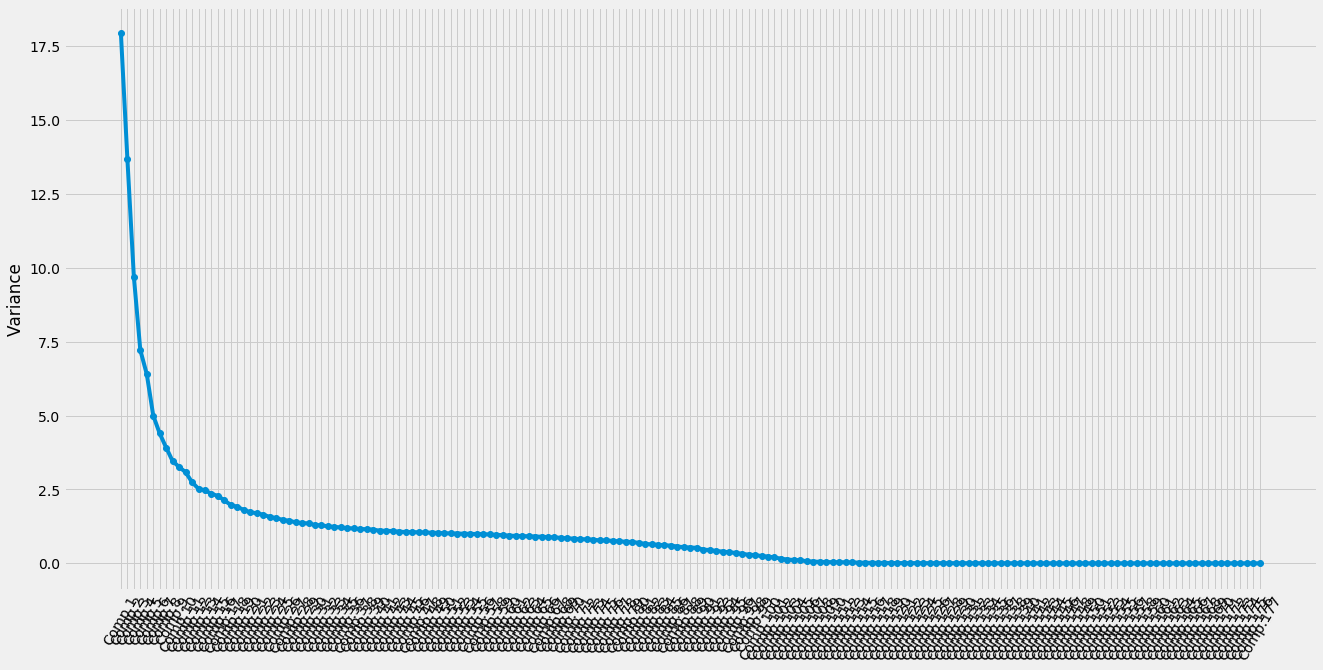

In [141]:
screeplot(pca, X_train_scaled)

In [142]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

84

In [178]:
pca=PCA(n_components=d)
X_train_reduced=pca.fit_transform(X_train_scaled)
X_test_reduced=pca.fit_transform(X_test_scaled)

In [180]:
X_train_reduced.shape, X_train_scaled.shape, X_test_reduced.shape, X_test_scaled.shape

((7645, 84), (7645, 177), (1912, 84), (1912, 177))

In [146]:
X_train_reduced

array([[ 3.23492828,  0.4616652 , -1.25286416, ..., -0.05656657,
         0.01313594,  1.16763193],
       [ 4.48900102,  0.37972634, -0.52932005, ...,  0.28431032,
        -0.38580169,  0.16039934],
       [-1.59252164,  5.05987052, -3.83873851, ...,  0.00594538,
         0.93695643,  0.27896115],
       ...,
       [ 2.5602193 , -3.20764875,  1.59183241, ...,  0.98306513,
        -0.34849773, -0.36979882],
       [-1.9937188 ,  0.77072576, -1.31223446, ...,  0.66736038,
        -0.64489088, -0.98622016],
       [ 1.73460504, -0.87170641, -0.96925107, ..., -0.18052202,
        -0.17939509, -0.01326479]])

In [147]:
%matplotlib inline

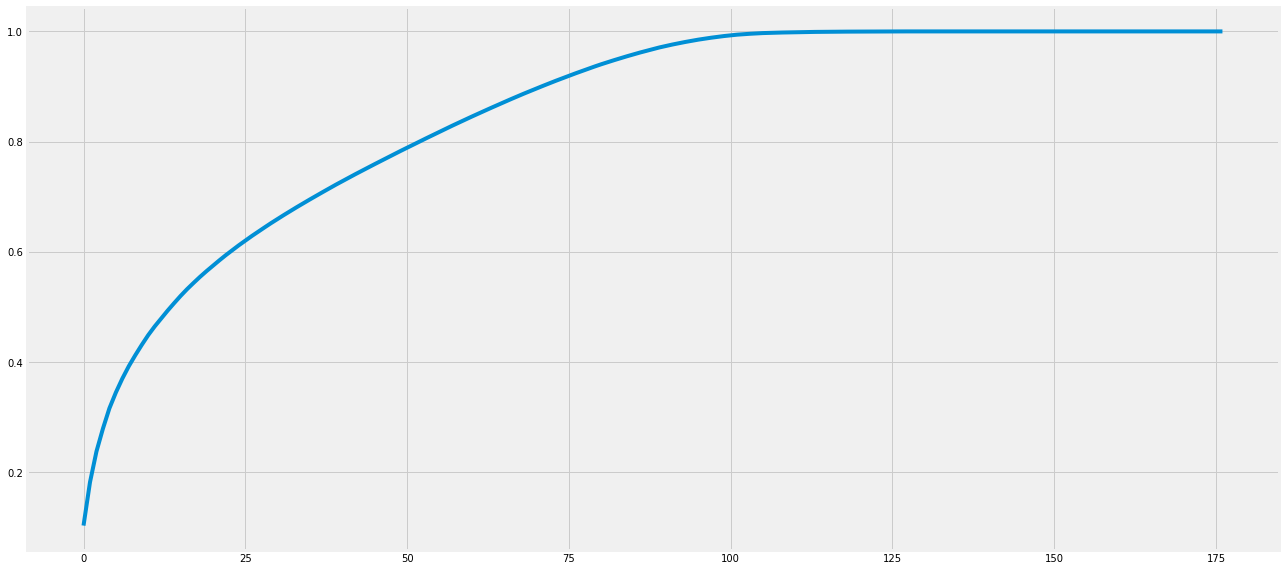

In [148]:
plt.figure(figsize=(20,10))
plt.plot(cumsum)

# 7 Model Training : Now that the data is scaled and with reduced dimensions; let us do some Model Training.


In [149]:
X_train_reduced.shape,y_train.shape

((7645, 84), (7645,))

# 7.1 H2O Modeling

In [150]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 19 hours 35 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,2 months and 26 days
H2O cluster name:,H2O_from_python_rajku_k04c4l
H2O cluster total nodes:,1
H2O cluster free memory:,3.056 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [154]:
train_h2o =h2o.import_file("train.csv")
test_h2o =h2o.import_file("test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [155]:
type(train_h2o), type(test_h2o)

(h2o.frame.H2OFrame, h2o.frame.H2OFrame)

In [156]:
train_h2o['Target'] = train_h2o['Target'].asfactor()

In [157]:
train_h2o['Target'].levels()

[['1', '2', '3', '4']]

In [158]:
trainh,testh = train_h2o.split_frame(ratios= [0.7])
trainh.shape, testh.shape

((6713, 143), (2844, 143))

In [159]:
trainh_columns = trainh.columns[0:142] 
y_columns = trainh.columns[142] 

In [160]:
trainh['Target'] = trainh['Target'].asfactor()

In [161]:
h2o_model = H2ODeepLearningEstimator(epochs=1000,
                                    distribution = 'bernoulli',                 # Response has two levels
                                    missing_values_handling = "MeanImputation", # Not needed by us
                                    variable_importances=True,
                                    nfolds = 2,                           # CV folds
                                    fold_assignment = "Stratified",       # Each fold must be sampled carefully
                                    keep_cross_validation_predictions = True,  # For analysis
                                    balance_classes=False,                # SMOTE is not provided by h2o
                                    standardize = True,                   # z-score standardization
                                    activation = 'RectifierWithDropout',  # Default dropout is 0.5
                                    hidden = [100,100],                  # ## more hidden layers -> more complex interactions
                                    stopping_metric = 'logloss',
                                    loss = 'CrossEntropy')

In [189]:
import time
from time import time

In [164]:
start = time()
h2o_model.train(trainh_columns,
               y_columns,
               training_frame = trainh)
end = time()
(end - start)/60

deeplearning Model Build progress: |██████████████████████████████████████| 100%


6.600403618812561

In [165]:
print(h2o_model)

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1559165189702_5


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.0009728473369953344
RMSE: 0.031190500749352108
LogLoss: 0.004319980966944816
Mean Per-Class Error: 0.0024529466299780074
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,Error,Rate
513.0,4.0,0.0,0.0,0.0077369,4 / 517
0.0,1102.0,1.0,0.0,0.0009066,"1 / 1,103"
0.0,1.0,855.0,0.0,0.0011682,1 / 856
0.0,0.0,0.0,4237.0,0.0,"0 / 4,237"
513.0,1107.0,856.0,4237.0,0.0008938,"6 / 6,713"


Top-4 Hit Ratios: 


k,hit_ratio
1,0.9991062
2,1.0
3,1.0
4,1.0



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.1927390864968048
RMSE: 0.4390205991713883
LogLoss: 0.7004974215418681
Mean Per-Class Error: 0.3934055918323777
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,Error,Rate
251.0,99.0,44.0,123.0,0.5145068,266 / 517
53.0,622.0,97.0,331.0,0.4360834,"481 / 1,103"
33.0,114.0,374.0,335.0,0.5630841,482 / 856
17.0,123.0,114.0,3983.0,0.0599481,"254 / 4,237"
354.0,958.0,629.0,4772.0,0.2209146,"1,483 / 6,713"


Top-4 Hit Ratios: 


k,hit_ratio
1,0.7790853
2,0.8949799
3,0.9632057
4,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid
accuracy,0.7790511,0.0052508,0.7716253,0.7864769
err,0.2209489,0.0052508,0.2283747,0.2135231
err_count,741.5,15.202796,763.0,720.0
logloss,0.7004693,0.0043087,0.6943758,0.7065628
max_per_class_error,0.561424,0.0279115,0.5219512,0.6008968
mean_per_class_accuracy,0.6068716,0.0033661,0.6021112,0.6116319
mean_per_class_error,0.3931285,0.0033661,0.3978888,0.3883681
mse,0.1927561,0.0025976,0.1964296,0.1890825
r2,0.8082222,0.0040237,0.8025318,0.8139126
rmse,0.4390200,0.0029584,0.4432038,0.4348362


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
,2019-05-31 12:15:27,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan
,2019-05-31 12:15:29,3 min 32.797 sec,6087 obs/sec,1.7013258,1,11421.0,0.5441633,0.8377625,0.7055560,0.3441084
,2019-05-31 12:15:38,3 min 42.170 sec,6604 obs/sec,10.1684791,6,68261.0,0.5061885,0.7339210,0.7452180,0.3028452
,2019-05-31 12:15:48,3 min 52.413 sec,6941 obs/sec,20.3315954,12,136486.0,0.4548989,0.5975773,0.7942338,0.2367049
,2019-05-31 12:15:58,4 min 1.548 sec,7312 obs/sec,30.4929242,18,204699.0,0.4056136,0.4801707,0.8364052,0.1811411
,2019-05-31 12:16:07,4 min 10.497 sec,7569 obs/sec,40.6590198,24,272944.0,0.3638828,0.3895794,0.8683359,0.1363027
,2019-05-31 12:16:17,4 min 20.546 sec,7802 obs/sec,52.5203337,31,352569.0,0.3122697,0.2941062,0.9030375,0.0981677
,2019-05-31 12:16:28,4 min 32.930 sec,7788 obs/sec,64.3792641,38,432178.0,0.2624973,0.2160392,0.9314837,0.0586921
,2019-05-31 12:16:49,4 min 53.499 sec,8173 obs/sec,91.4763891,54,614081.0,0.1507211,0.0826848,0.9774112,0.0199613
,2019-05-31 12:16:59,5 min 3.065 sec,8283 obs/sec,103.3171458,61,693568.0,0.1171806,0.0529149,0.9863461,0.0135558


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
parentesco3,1.0,1.0,0.0020780
estadocivil3,0.8806481,0.8806481,0.0018300
instlevel4,0.8379270,0.8379270,0.0017412
parentesco1,0.8341450,0.8341450,0.0017334
instlevel3,0.8252672,0.8252672,0.0017149
---,---,---,---
idhogar.796b14867,0.0623628,0.0623628,0.0001296
idhogar.567183582,0.0610139,0.0610139,0.0001268
idhogar.390dafa00,0.0606044,0.0606044,0.0001259
idhogar.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()



In [248]:
# 5.3 Column importance:
h2o_model_imp = pd.DataFrame(h2o_model.varimp(),
             columns=["Variable", "Relative Importance", "Scaled Importance", "Percentage"])

In [250]:
h2o_model_imp.head(20)

,Variable,Relative Importance,Scaled Importance,Percentage
0,parentesco3,1.000000,1.000000,0.002078
1,estadocivil3,0.880648,0.880648,0.001830
2,instlevel4,0.837927,0.837927,0.001741
3,parentesco1,0.834145,0.834145,0.001733
4,instlevel3,0.825267,0.825267,0.001715
5,instlevel8,0.802335,0.802335,0.001667
6,parentesco2,0.758293,0.758293,0.001576
7,estadocivil7,0.747187,0.747187,0.001553
8,instlevel5,0.733925,0.733925,0.001525
9,techootro,0.691449,0.691449,0.001437


# 7.2 XGBoost Classifier

In [169]:
XGBCLF= XGBClassifier(silent = False,n_jobs=2)

# We will use the already scaled and reduced dimension data. 

In [182]:
X_train_reduced.shape,y_train.shape, X_test_reduced.shape, y_test.shape

((7645, 84), (7645,), (1912, 84), (1912,))

In [172]:
XGBCLF.fit(X_train_reduced,y_train)

[12:30:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[12:30:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[12:30:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[12:30:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[12:30:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:30:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[12:30:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[12:30:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[12:30:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_d

[12:30:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[12:30:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:30:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_d

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=2, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [173]:
XGBCLF.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=2, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)>

In [181]:
XGB_pred = XGBCLF.predict(X_test_reduced)

In [183]:
##Accuracy of model.
(XGB_pred==y_test).sum()/(y_test.size)*100

53.76569037656904

In [185]:
from sklearn.metrics import classification_report

In [187]:
print(classification_report(y_test,XGB_pred))

              precision    recall  f1-score   support

           1       0.03      0.01      0.01       163
           2       0.09      0.06      0.08       294
           3       0.08      0.01      0.01       250
           4       0.61      0.83      0.70      1205

   micro avg       0.54      0.54      0.54      1912
   macro avg       0.20      0.23      0.20      1912
weighted avg       0.41      0.54      0.46      1912



In [251]:
XGBCLF.feature_importances_

array([0.08903605, 0.06144224, 0.04415011, 0.01766004, 0.03016924,
       0.03090508, 0.03715968, 0.01103753, 0.00551876, 0.00367918,
       0.03090508, 0.01287712, 0.0062546 , 0.00551876, 0.01324503,
       0.0084621 , 0.01802796, 0.0147167 , 0.01434879, 0.00772627,
       0.02428256, 0.01949963, 0.0084621 , 0.01030169, 0.01618837,
       0.02207506, 0.00735835, 0.01361295, 0.02170714, 0.01361295,
       0.00699043, 0.0062546 , 0.00147167, 0.00883002, 0.00331126,
       0.00220751, 0.00772627, 0.00367918, 0.00183959, 0.0084621 ,
       0.00735835, 0.00515085, 0.00809419, 0.00331126, 0.00551876,
       0.0062546 , 0.0062546 , 0.00220751, 0.01287712, 0.00220751,
       0.00073584, 0.00515085, 0.00551876, 0.00404709, 0.00367918,
       0.00331126, 0.00110375, 0.0147167 , 0.00662252, 0.00183959,
       0.00331126, 0.0062546 , 0.00183959, 0.00331126, 0.02170714,
       0.0062546 , 0.00956586, 0.00294334, 0.00551876, 0.00919794,
       0.00441501, 0.00331126, 0.00883002, 0.00147167, 0.00551

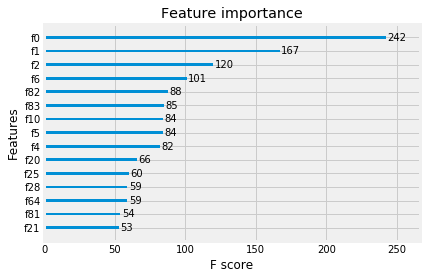

In [270]:
plot_importance(XGBCLF,max_num_features=15)

In [269]:
pd.DataFrame({'Feature Importance':XGBCLF.feature_importances_}).sort_values(by = "Feature Importance", ascending=False)

,Feature Importance
0,0.089036
1,0.061442
2,0.044150
6,0.037160
82,0.032377
83,0.031273
5,0.030905
10,0.030905
4,0.030169
20,0.024283


# 7.3 Gradient Boosting Classifier

In [191]:
GBM=gbm()


In [193]:
start = time()
GBM.fit(X_train_reduced,y_train)
end = time()
(end-start)/60

0.6681476990381877

In [195]:
GBM_pred = GBM.predict(X_test_reduced) 

In [196]:
##Accuracy of model.
(GBM_pred ==y_test).sum()/(y_test.size)*100

55.17782426778243

In [197]:
print(classification_report(y_test,GBM_pred))

              precision    recall  f1-score   support

           1       0.09      0.02      0.03       163
           2       0.14      0.09      0.11       294
           3       0.11      0.02      0.03       250
           4       0.62      0.85      0.72      1205

   micro avg       0.55      0.55      0.55      1912
   macro avg       0.24      0.24      0.22      1912
weighted avg       0.43      0.55      0.48      1912



# 7.4 Random Forest Classifier

In [198]:
RanForCLF = RandomForestClassifier(random_state=42)
start = time()
RanForCLF.fit(X_train_reduced,y_train)
end = time()
(end-start)/60

C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.018132197856903075

In [199]:
RanForpred = RanForCLF.predict(X_test_reduced)


In [200]:
##Accuracy of model.
(RanForpred==y_test).sum()/(y_test.size)*100

47.69874476987448

In [201]:
print(classification_report(y_test,RanForpred))


              precision    recall  f1-score   support

           1       0.03      0.01      0.02       163
           2       0.11      0.11      0.11       294
           3       0.08      0.04      0.05       250
           4       0.61      0.72      0.66      1205

   micro avg       0.48      0.48      0.48      1912
   macro avg       0.21      0.22      0.21      1912
weighted avg       0.41      0.48      0.44      1912



In [203]:
#pd.DataFrame({'Feature Importance':RanForCLF.feature_importances_}).sort_values(by = "Feature Importance", ascending=False)

# 7.5 KNeighborsClassifier

In [214]:
knnclf = KNeighborsClassifier(n_neighbors=4,p=2,metric='minkowski',n_jobs=-1)

In [215]:
start = time()
knnclf.fit(X_train_reduced,y_train)
end = time()
(end-start)/60

0.0007347981135050456

In [216]:
knn_pred = knnclf.predict(X_test_reduced)

In [217]:
##Accuracy of model.
(knn_pred==y_test).sum()/(y_test.size)*100

45.65899581589959

In [218]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           1       0.08      0.05      0.06       163
           2       0.09      0.09      0.09       294
           3       0.11      0.09      0.10       250
           4       0.61      0.68      0.64      1205

   micro avg       0.46      0.46      0.46      1912
   macro avg       0.22      0.23      0.22      1912
weighted avg       0.42      0.46      0.44      1912



# 7.6 Decision Tree Classifier

In [233]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X_train_reduced,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [234]:
treeclfpred = treeclf.predict(X_test_reduced) 

In [235]:
##Accuracy of model.
(treeclfpred==y_test).sum()/(y_test.size)*100

44.29916317991632

In [236]:
print(classification_report(y_test,treeclfpred))

C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       163
           2       0.07      0.12      0.09       294
           3       0.00      0.00      0.00       250
           4       0.57      0.67      0.62      1205

   micro avg       0.44      0.44      0.44      1912
   macro avg       0.16      0.20      0.18      1912
weighted avg       0.37      0.44      0.40      1912



# Inference from the above models is that H2O Deeplearning Estimator provided the best Accuracy Score of 78%. The rest of the models provided less than 55% Accuracy OR F1 (Micro). 
# Hence let us see how we can optimize the Hyperparameters for XG Boost Classifier which gave us 55% Accuracy and see how the optimization helps.

In [237]:
from bayes_opt import BayesianOptimization

In [238]:
         
para_set = {
           'learning_rate':  (0, 1),                 # any value between 0 and 1
           'n_estimators':   (50,300),               # any number between 50 to 300
           'max_depth':      (3,10),                 # any depth between 3 to 10
           'n_components' :  (20,30)                 # any number between 20 to 30
            }

In [241]:
def xg_eval(learning_rate,n_estimators, max_depth,n_components):
    # 12.1 Make pipeline. Pass parameters directly here
    pipe_xg1 = (XGBClassifier             (
                                           silent = False,
                                           n_jobs=2,
                                           learning_rate=learning_rate,
                                           max_depth=int(round(max_depth)),
                                           n_estimators=int(round(n_estimators))
                                           )
                )

    # 12.2 Now fit the pipeline and evaluate
    cv_result = cross_val_score(estimator = pipe_xg1,
                                X= X_train_reduced,
                                y = y_train,
                                cv = 2,
                                n_jobs = 2,
                                scoring = 'accuracy'
                                ).mean()             # take the average of all results


    # 12.3 Finally return maximum/average value of result
    return cv_result
           

In [242]:
xgBO = BayesianOptimization(xg_eval,para_set)
                         

In [243]:
gp_params = {"alpha": 1e-5} 

In [245]:
start = time()
xgBO.maximize(init_points=5,    # Number of randomly chosen points to
                                 # sample the target function before
                                 #  fitting the gaussian Process (gp)
                                 #  or gaussian graph
               n_iter=25,      # Total number of times the
               #acq="ucb",       # ucb: upper confidence bound
                                 #   process is to be repeated
                                 # ei: Expected improvement
               # kappa = 1.0     # kappa=1 : prefer exploitation; kappa=10, prefer exploration
               **gp_params
               )
end = time()
(end-start)/60

|   iter    |  target   | learni... | max_depth | n_comp... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.7362   |  0.3082   |  3.82     |  24.26    |  158.0    |
|  2        |  0.7337   |  0.8566   |  3.676    |  22.27    |  291.0    |
|  3        |  0.7381   |  0.7941   |  3.746    |  25.55    |  166.2    |
|  4        |  0.7451   |  0.574    |  5.248    |  24.17    |  269.4    |
|  5        |  0.7177   |  0.4      |  3.305    |  23.37    |  151.6    |
|  6        |  0.7487   |  0.3308   |  9.461    |  29.83    |  50.07    |
|  7        |  0.7496   |  0.5078   |  9.856    |  29.84    |  298.8    |
|  8        |  0.7339   |  0.9962   |  9.946    |  29.92    |  220.9    |
|  9        |  0.6944   |  0.1441   |  3.658    |  20.26    |  50.1     |
|  10       |  0.7308   |  0.355    |  3.06     |  29.93    |  275.2    |
|  11       |  0.7436   |  0.02746  |  9.98     |  20.13    |  177.6    |
|  12       |  0.7485   |  0.08851  | 

17.645389433701833

In [246]:
xgBO.res


[{'target': 0.7361684669832755,
  'params': {'learning_rate': 0.3081905889541229,
   'max_depth': 3.820370269902845,
   'n_components': 24.264690681944025,
   'n_estimators': 157.99862007575203}},
 {'target': 0.733681693547769,
  'params': {'learning_rate': 0.856626083553187,
   'max_depth': 3.6756730364811117,
   'n_components': 22.270022118625903,
   'n_estimators': 291.04294991672873}},
 {'target': 0.7381293534190594,
  'params': {'learning_rate': 0.7941240479533526,
   'max_depth': 3.7462773302435672,
   'n_components': 25.55250983970087,
   'n_estimators': 166.15130227434403}},
 {'target': 0.7450623495021457,
  'params': {'learning_rate': 0.5739715646646324,
   'max_depth': 5.247821437766269,
   'n_components': 24.170082786019307,
   'n_estimators': 269.4451693106747}},
 {'target': 0.7177220086310074,
  'params': {'learning_rate': 0.4000306518061508,
   'max_depth': 3.304662361864173,
   'n_components': 23.3653469287844,
   'n_estimators': 151.6206164296388}},
 {'target': 0.748722

In [247]:
xgBO.max

{'target': 0.7569658126911507,
 'params': {'learning_rate': 0.09211219685326666,
  'max_depth': 9.983647918076336,
  'n_components': 21.012473478031644,
  'n_estimators': 298.9537589933136}}

In [256]:
params_new = xgBO.max['params']
params_new 

{'learning_rate': 0.09211219685326666,
 'max_depth': 9.983647918076336,
 'n_components': 21.012473478031644,
 'n_estimators': 298.9537589933136}

# We can see the Bayesian Optimization increased the Accuracy to 76%

# Done Done

# Cross validation

In [272]:
from sklearn.model_selection import cross_val_score

In [273]:
Scores = cross_val_score(XGBCLF, X=X_train_reduced, y=y_train, cv=10, scoring='accuracy',n_jobs=-1)

In [274]:
Scores.mean()

0.6950956313473112